In [1]:
# Import Neceassry Modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv(r'C:\Users\user\Downloads\train_loan.csv') # fetch file

In [3]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
data.duplicated().sum()

np.int64(0)

In [6]:
data = data.drop(['Loan_ID','Gender','Married','Dependents','Self_Employed'],axis=1)

In [7]:
data

,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Graduate,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Graduate,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Graduate,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Not Graduate,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Graduate,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...
609,Graduate,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Graduate,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Graduate,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Graduate,7583,0.0,187.0,360.0,1.0,Urban,Y


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          614 non-null    object 
 1   ApplicantIncome    614 non-null    int64  
 2   CoapplicantIncome  614 non-null    float64
 3   LoanAmount         592 non-null    float64
 4   Loan_Amount_Term   600 non-null    float64
 5   Credit_History     564 non-null    float64
 6   Property_Area      614 non-null    object 
 7   Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 38.5+ KB


# Do Label Encoding to remove objects

In [9]:
from sklearn.preprocessing import LabelEncoder
cat_cols = ['Education', 'Property_Area', 'Loan_Status']
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [10]:
data

,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,5849,0.0,NaN,360.0,1.0,2,1
1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,0,3000,0.0,66.0,360.0,1.0,2,1
3,1,2583,2358.0,120.0,360.0,1.0,2,1
4,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.0,360.0,1.0,0,1
610,0,4106,0.0,40.0,180.0,1.0,0,1
611,0,8072,240.0,253.0,360.0,1.0,2,1
612,0,7583,0.0,187.0,360.0,1.0,2,1


In [11]:
data.isna().sum()

Education             0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

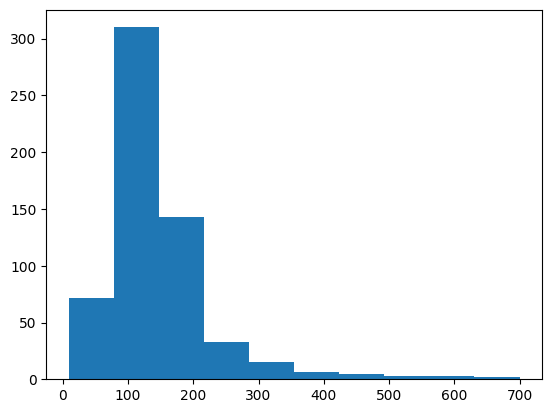

In [12]:
plt.hist(data['LoanAmount'])
plt.show()

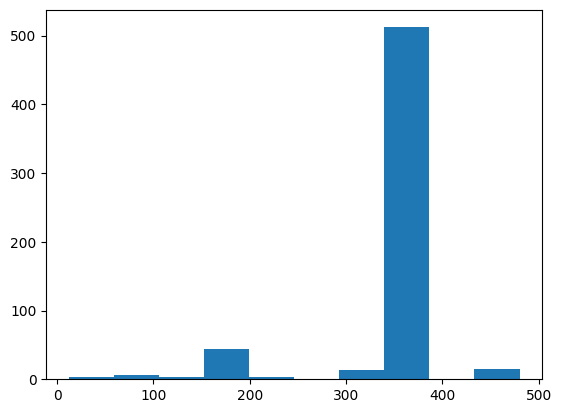

In [13]:
plt.hist(data['Loan_Amount_Term'])
plt.show()

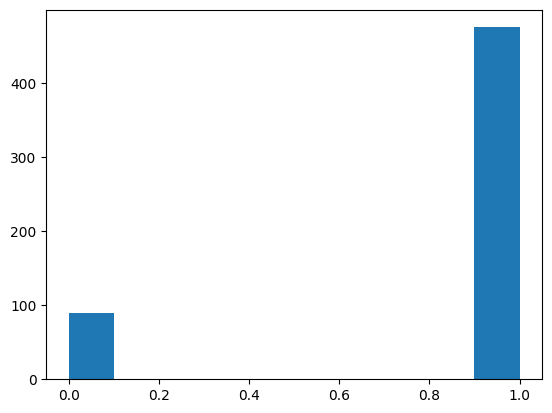

In [14]:
plt.hist(data['Credit_History'])
plt.show()

# Fill Null Values with Median

In [15]:
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].median())

In [16]:
data.isna().sum()

Education            0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [17]:
data

,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,5849,0.0,128.0,360.0,1.0,2,1
1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,0,3000,0.0,66.0,360.0,1.0,2,1
3,1,2583,2358.0,120.0,360.0,1.0,2,1
4,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.0,360.0,1.0,0,1
610,0,4106,0.0,40.0,180.0,1.0,0,1
611,0,8072,240.0,253.0,360.0,1.0,2,1
612,0,7583,0.0,187.0,360.0,1.0,2,1


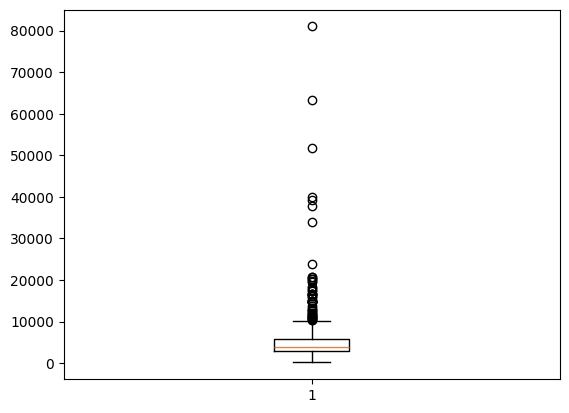

In [18]:
plt.boxplot(data['ApplicantIncome'])
plt.show()

In [19]:
data.dtypes

Education              int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

# Training

In [20]:
x = data.drop('Loan_Status',axis=1) 
y = data['Loan_Status']

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


# Accuracy Test Using LogisticRegression

In [22]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=800)
lr_model.fit(x_train,y_train)

LogisticRegression(max_iter=800)

In [23]:
y_pred_lr = lr_model.predict(x_test)

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix
print("Accuracy = ",accuracy_score(y_test,y_pred_lr))
print("Confusion Matrix = \n ", confusion_matrix(y_test,y_pred_lr))

Accuracy =  0.7886178861788617
Confusion Matrix = 
  [[18 25]
 [ 1 79]]


# Accuracy Test Using Logical KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier
met_k = [] 
ngh = np.arange(3,16) 
for n in ngh:
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(x_train,y_train) 
    y_pred  = clf.predict(x_test)
    acc = accuracy_score(y_test,y_pred) 
    met_k.append(acc)

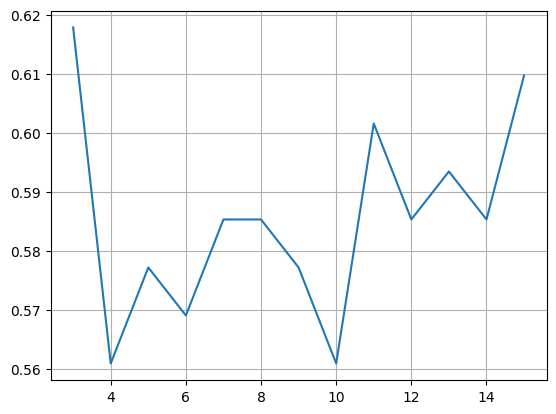

In [26]:
plt.plot(ngh,met_k)
plt.grid()

In [27]:
met_k

[0.6178861788617886,
 0.5609756097560976,
 0.5772357723577236,
 0.5691056910569106,
 0.5853658536585366,
 0.5853658536585366,
 0.5772357723577236,
 0.5609756097560976,
 0.6016260162601627,
 0.5853658536585366,
 0.5934959349593496,
 0.5853658536585366,
 0.6097560975609756]

In [28]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train,y_train)
y_pred_knn = knn_model.predict(x_test)
print("Accuracy = ",accuracy_score(y_test,y_pred_knn))
print("Confusion Matrix = \n ", confusion_matrix(y_test,y_pred_knn))

Accuracy =  0.6178861788617886
Confusion Matrix = 
  [[ 9 34]
 [13 67]]


# Accuracy Test Using Logical SVC

In [29]:
from sklearn.svm import SVC
sv = SVC(kernel='rbf')
sv.fit(x_train,y_train)
y_pred_svc = sv.predict(x_test)
print("Accuracy = ",accuracy_score(y_test,y_pred_svc))
print("Confusion Matrix = \n ", confusion_matrix(y_test,y_pred_svc))

Accuracy =  0.6504065040650406
Confusion Matrix = 
  [[ 0 43]
 [ 0 80]]


# Accuracy Test Using Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
print("Accuracy = ",accuracy_score(y_test,y_pred_dt))
print("Confusion Matrix = \n ", confusion_matrix(y_test,y_pred_dt))

Accuracy =  0.6991869918699187
Confusion Matrix = 
  [[25 18]
 [19 61]]


# Accuracy Test Using Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
print("Accuracy = ",accuracy_score(y_test,y_pred_rf))
print("Confusion Matrix = \n ", confusion_matrix(y_test,y_pred_rf))

Accuracy =  0.7398373983739838
Confusion Matrix = 
  [[19 24]
 [ 8 72]]


# Accuracy Test Using Grid Search

In [32]:
parameters = {'n_estimators':[50,100,150], 'max_depth':[None , 5,10],'criterion':['gini','entropy']}

In [35]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(rf,parameters, scoring='accuracy', cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [36]:
print("Best Paramters = ", grid_search.best_params_)

Best Paramters =  {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 50}


In [37]:
best_model = grid_search.best_estimator_

In [38]:
y_pred = best_model.predict(x_test)
accuracy_score(y_test,y_pred)

0.7479674796747967

# Accuracy Using RandomizedSearchCV

In [39]:
from sklearn.model_selection import RandomizedSearchCV

In [40]:
random_search = RandomizedSearchCV(estimator = rf,param_distributions=parameters,n_iter=10,scoring='accuracy',cv=3) 
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 5, 10],
                                        'n_estimators': [50, 100, 150]},
                   scoring='accuracy')

In [41]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(x_test) 
print("Best Paramter Found : " , random_search.best_params_) 
print("Test Accuracy : " , accuracy_score(y_test,y_pred))

Best Paramter Found :  {'n_estimators': 150, 'max_depth': 5, 'criterion': 'entropy'}
Test Accuracy :  0.7804878048780488


# LogisticRegression has the Best Accuracy, which is 78%